# Data Science and IA

    :
    Pandas:
    Original dataset:  https://drive.google.com/file/d/1lBMBit0Ekgc2ARv0P-L8WuU-JetVQOTz/view?usp=sharing
    

# 1: Importing the Dataset

In [1]:
import pandas

dataframe = pandas.read_csv('./resource/advertising.csv')
display(dataframe

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


# 2: Exploratory Data Analysis 

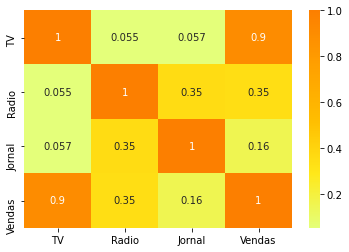

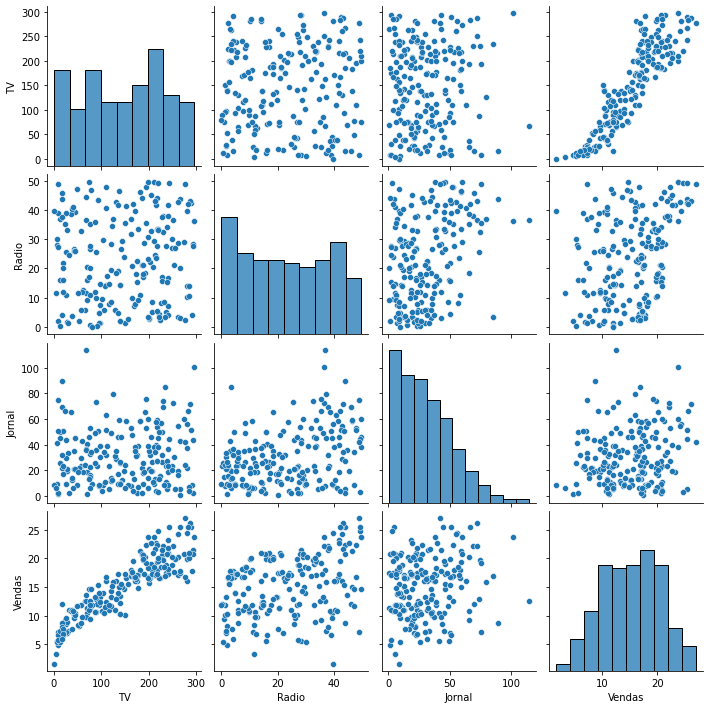

In [7]:
import matplotlib.pyplot as plot
import seaborn

seaborn.heatmap(dataframe.corr(), cmap="Wistia", annot=True)
plot.show()

seaborn.pairplot(dataframe)
plot.show()

# 3: Machine Learning Model Training

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Result of the function
y = dataframe['Vendas']
# Parameters
x = dataframe.drop('Vendas', axis=1)

# apply the train test split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=1)

linear_regression_model = LinearRegression()
random_forest_model = RandomForestRegressor()

linear_regression_model.fit(x_train, y_train)
random_forest_model.fit(x_train, y_train)

RandomForestRegressor()


# 4: Testing and Evaluating the Model

In [11]:
from sklearn import metrics 

predict_regression_model = linear_regression_model.predict(x_test)
predict_forest_model = random_forest_model.predict(x_test)

#evaluating
display(metrics.r2_score(y_test, predict_regression_model))
display(metrics.r2_score(y_test, predict_forest_model))

0.9048917241361681

0.9676588940468194

# 5: Graphical Representation of the Evaluation

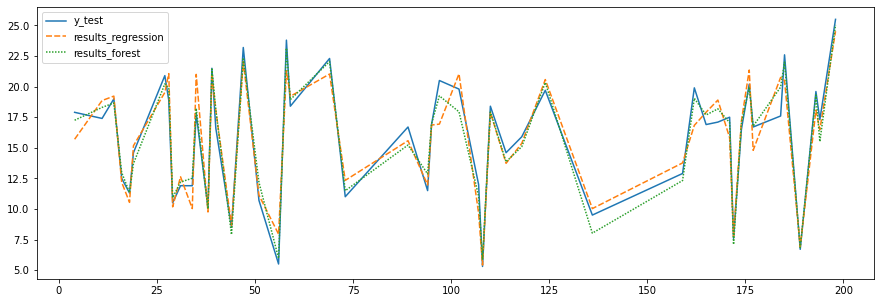

In [15]:
# Best one is the forest model

prediction_dataframe = pandas.DataFrame()
prediction_dataframe['y_test'] = y_test
prediction_dataframe['results_regression'] = predict_regression_model
prediction_dataframe['results_forest'] = predict_forest_model

plot.figure(figsize=(15,5)) # zoom
seaborn.lineplot(data=prediction_dataframe)
plot.show()

Wich variables have better effects on the sales. 

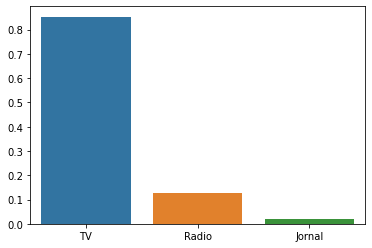

array([22.073])

In [18]:
seaborn.barplot(x=x_test.columns, y=random_forest_model.feature_importances_)
plot.show()

# 6: Results

In [19]:
data_frame_with_unknown_sales = pandas.read_csv('./resource/advertising-for-predict.csv')

predict_result = random_forest_model.predict(data_frame_with_unknown_sales)
display(predict_result)  # the original value was 22.1 he found somethin very close!

array([22.073])